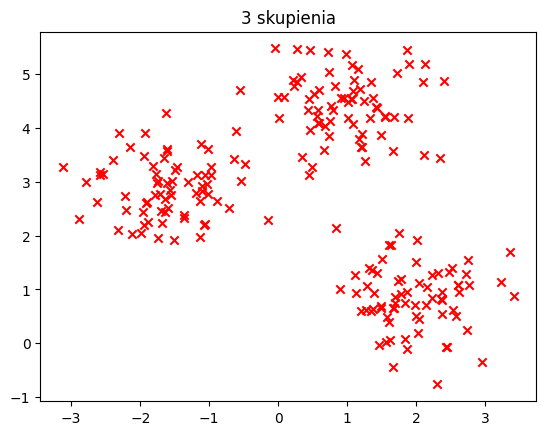

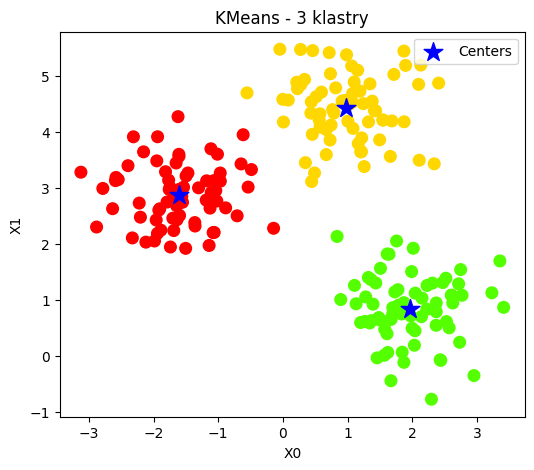

Inercja (suma kwadratów błędów): 142.2534353462042


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
import seaborn as sns

X, y = make_blobs(n_samples=210, centers=3, n_features=2, cluster_std=0.6, shuffle=True, random_state=0)
plt.scatter(X[:,0], X[:,1], c='red', marker='x')
plt.title("3 skupienia")
plt.show()

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=0)
y_km = km.fit_predict(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200, color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("KMeans - 3 klastry")
plt.show()

print("Inercja (suma kwadratów błędów):", km.inertia_)

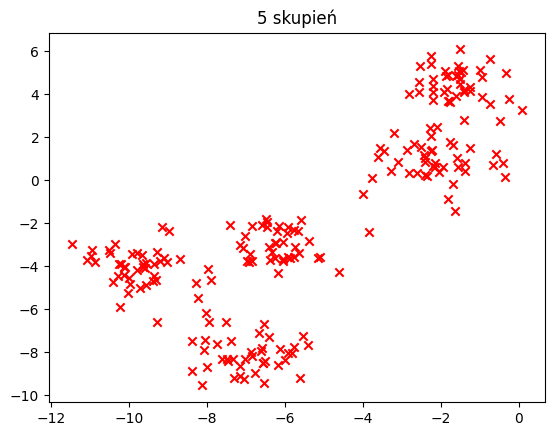

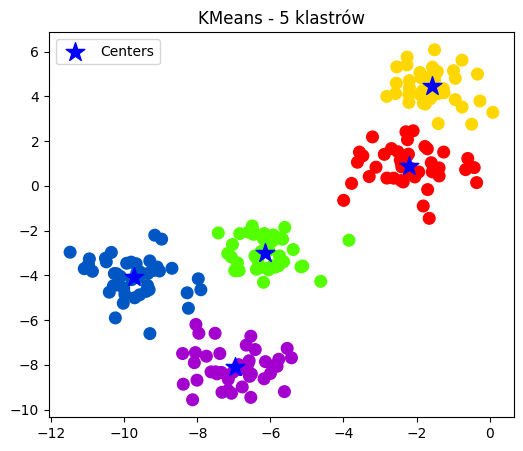

Inercja (3 klastry): 826.9636682507859
Inercja (5 klastrów): 253.49463658436804
Inercja (7 klastrów): 211.05993643745217


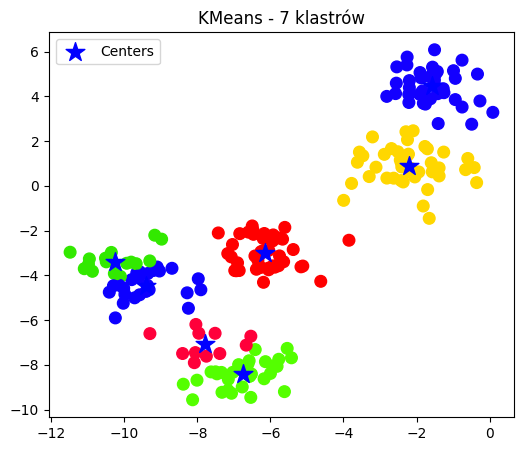

In [ ]:
X2, y2 = make_blobs(n_samples=210, centers=5, n_features=2, cluster_std=0.8, shuffle=True, random_state=1)
plt.scatter(X2[:,0], X2[:,1], c='red', marker='x')
plt.title("5 skupień")
plt.show()

km2 = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=1)
y_km2 = km2.fit_predict(X2)
plt.figure(figsize=(6,5))
plt.scatter(X2[:,0], X2[:,1], s=70, c=km2.labels_, cmap=plt.cm.prism)
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], marker='*', s=200, color='blue', label='Centers')
plt.legend(loc='best')
plt.title("KMeans - 5 klastrów")
plt.show()


km3 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=1)
y_km3 = km3.fit_predict(X2)
km4 = KMeans(n_clusters=7, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=1)
y_km4 = km4.fit_predict(X2)

print("Inercja (3 klastry):", km3.inertia_)
print("Inercja (5 klastrów):", km2.inertia_)
print("Inercja (7 klastrów):", km4.inertia_)



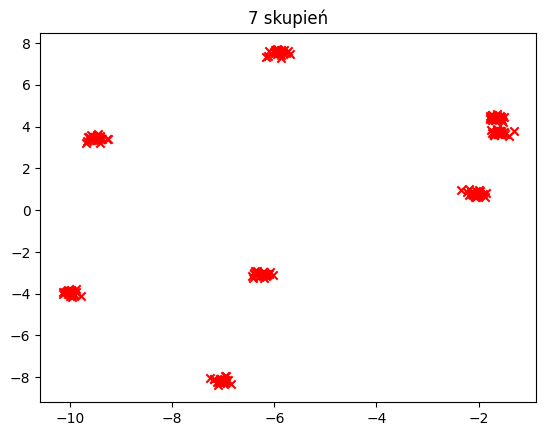

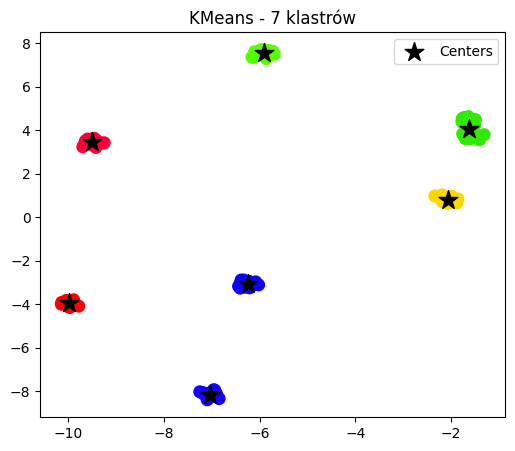

In [37]:
X3, y3 = make_blobs(n_samples=210, centers=8, n_features=2, cluster_std=0.1, shuffle=True, random_state=1)
plt.scatter(X3[:,0], X3[:,1], c='red', marker='x')
plt.title("7 skupień")
plt.show()
km4 = KMeans(n_clusters=7, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=1)
y_km4 = km4.fit_predict(X3)
plt.figure(figsize=(6,5))
plt.scatter(X3[:,0], X3[:,1], s=70, c=km4.labels_, cmap=plt.cm.prism)
plt.scatter(km4.cluster_centers_[:, 0], km4.cluster_centers_[:, 1], marker='*', s=200, color='black', label='Centers')
plt.legend(loc='best')
plt.title("KMeans - 7 klastrów")
plt.show()

In [18]:

km_pp = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=1)
y_km_pp = km_pp.fit_predict(X2)
print("Inercja (k-means++):", km_pp.inertia_)


Inercja (k-means++): 253.49463658436804


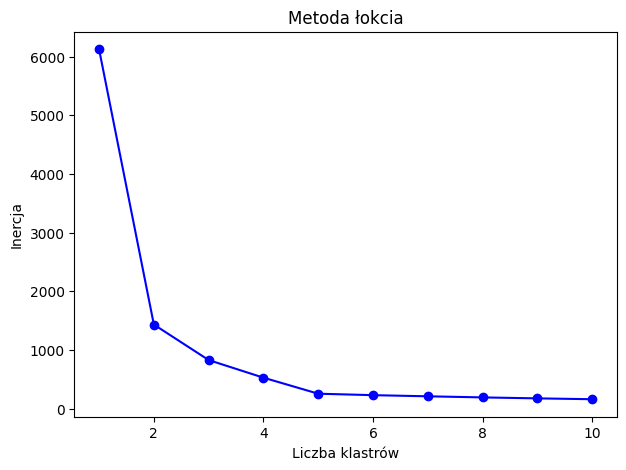

In [ ]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=1)
    kmeans.fit(X2)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inercja')
plt.title('Metoda łokcia')
plt.show()

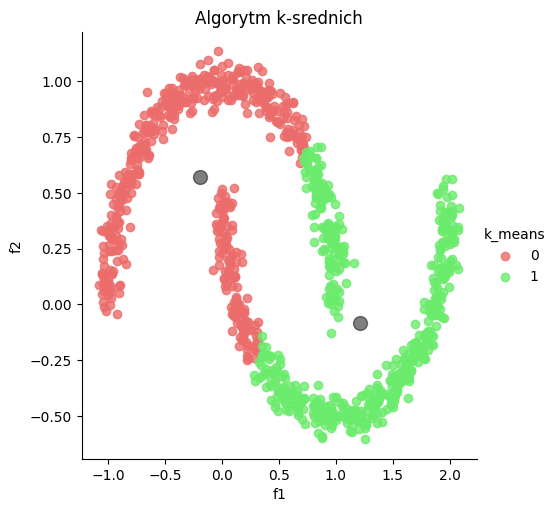

In [12]:
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=0)
y_km = km.fit_predict(X_moon)
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue='k_means', palette=['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', s=100, alpha=0.5)
plt.show()